In [1]:
# 中心极限定理
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson

In [2]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (6.0, 6.0)

例: 某药厂断言，该厂生产的某药品对医治一种疑难的血液病治愈率为0.8. 医院检验员任取
100个服用此药的病人,如果其中多于75个治愈，就接受这一断言，否则就拒绝这一断言.
若实际上此药对这种病的治愈是0.8,问接受这一断言的概率是多少？ 

## 伯努利分布 $E(X) = p, D(X) = pq$

In [3]:
p = 0.8
bern_froz = bernoulli(p)
mean, var, skewness, kurtosis = bern_froz.stats(moments='mvsk')
print("bernoulli:", mean, var, skewness, kurtosis)

bernoulli: 0.8 0.15999999999999998 -1.5000000000000016 0.250000000000012


## 二项分布$f(x) = \binom{n}{k}p^k(1-p)^{n-k}$

In [4]:
# 这里的n不是样本的个数, n重伯努利实验, 而是总体分布的参数
n = 100
binom_froz = binom(n, p)
mean, var, skewness, kurtosis = binom_froz.stats(moments='mvsk')
print("binom:", mean, var, skewness, kurtosis)

# $\binom{100}{75}$ print("1-cdf(75): ", 1 - binom_froz.cdf(75))

binom: 80.0 15.999999999999996 -0.15000000000000005 0.0025000000000000027


## 近似正态分布 $E(X) = np, D(X) = npq$

In [5]:
# 满足n*p 和 n*(1-p)都大于5, 近似正态分布
print(n*p > 5, n*(1-p) > 5)

# 正态分布
norm_froz = norm(n*p, np.sqrt(n*p*(1-p)))
mean, var, skewness, kurtosis = norm_froz.stats(moments='mvsk')
print("norm:", mean, var, skewness, kurtosis)

print("1-cdf(75): ", 1 - norm_froz.cdf(75 - 0.5))

True True
norm: 80.0 15.999999999999996 0.0 0.0
1-cdf(75):  0.9154342776486644


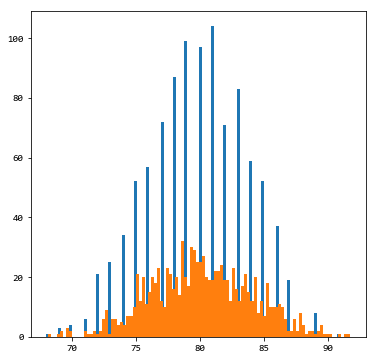

In [6]:
# 以概率p, 实验size次(重复样本, 样本量), 出现p对应的事件的次数k, n是次数上限, 可以用频率图描述
# n次伯努利分布随机变量的和

binom_rvs_nd = binom_froz.rvs(size = 10*n)
norm_rvs_nd = norm_froz.rvs(size = 10*n)
plt.hist(x = binom_rvs_nd, bins=n)
plt.hist(x = norm_rvs_nd, bins=n)
plt.show()

## 泊松分布 $E(X) = \lambda, D(X) = \lambda$

In [7]:
# 当n趋于无穷大时,即一个时间段分为n个细小的段, 每个细小的段发生某事件(0, 1)
# 当lambda(平均发生次数) = np (n很大, p很小时)
# 通常当n≧20,p≦0.05时, 二项分布可以使用泊松分布近似
# 汽车站台的候客人数
n, p = 50, 0.2
q = 1-p
lam = n*p

pois_froz = poisson(lam)
mean, var, skewness, kurtosis = pois_froz.stats(moments='mvsk')
print("poisson:", mean, var, skewness, kurtosis)

pois_xs_nd = np.arange(pois_froz.ppf(0.01), pois_froz.ppf(0.99))
pois_ys_nd = pois_froz.pmf(pois_xs_nd)
binom_ys_nd = binom.pmf(pois_xs_nd, n, p)
norm_ys_nd = norm.pdf(pois_xs_nd, n*p, math.sqrt(n*p*q))


n2, p2 = 10, 0.2
q2 = 1-p2
lam2 = n2*p2

pois_froz2 = poisson(lam2)
mean, var, skewness, kurtosis = pois_froz2.stats(moments='mvsk')
print("poisson:", mean, var, skewness, kurtosis)

pois_xs_nd2 = np.arange(pois_froz2.ppf(0.01), pois_froz2.ppf(0.99))
pois_ys_nd2 = pois_froz2.pmf(pois_xs_nd2)
binom_ys_nd2 = binom.pmf(pois_xs_nd2, n2, p2)
norm_ys_nd2 = norm.pdf(pois_xs_nd2, n2*p2, math.sqrt(n2*p2*q2))

poisson: 10.0 10.0 0.31622776601683794 0.1
poisson: 2.0 2.0 0.7071067811865476 0.5


## 二项分布, 泊松分布, 正态分布的近似

Text(0.5,1,'n = 10(<=20)')

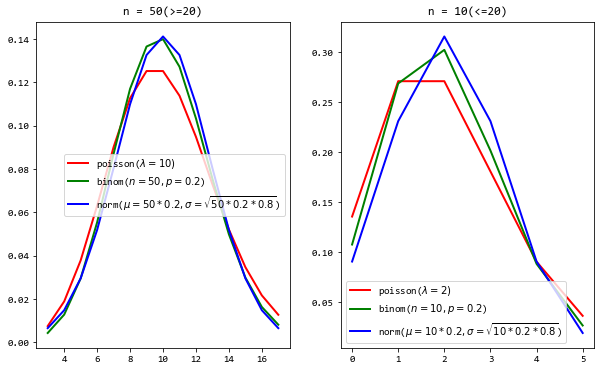

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
ax1.plot(pois_xs_nd, pois_ys_nd,
         color='r', lw=2, label='poisson($\lambda=%d)$' % lam)
ax1.plot(pois_xs_nd, binom_ys_nd,
         color='g', lw=2, label='binom($n=%d, p=%.1f$)' % (n, p))
ax1.plot(pois_xs_nd, norm_ys_nd,
         color='b', lw=2, label='norm($\mu=%d*%.1f, \sigma=\sqrt{%d*%.1f*%.1f}$)' % (n, p, n, p, q))
ax1.legend()
ax1.set_title('n = 50(>=20)')

ax2.plot(pois_xs_nd2, pois_ys_nd2,
         color='r', lw=2,
         label='poisson($\lambda=%d)$' % lam2)
ax2.plot(pois_xs_nd2, binom_ys_nd2,
         color='g', lw=2,
         label='binom($n=%d, p=%.1f$)' % (n2, p2))
ax2.plot(pois_xs_nd2, norm_ys_nd2,
         color='b', lw=2,
         label='norm($\mu=%d*%.1f, \sigma=\sqrt{%d*%.1f*%.1f}$)' % (n2, p2, n2, p2, q2))
ax2.legend()
ax2.set_title('n = 10(<=20)')